<a href="https://colab.research.google.com/github/kaydee24/Applied-Machine-Learning/blob/master/Linear%20Regression%20without%20sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
##This block is only for access of files using google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

#For accessing any file from google drive, first share it for public access. Copy its id from last part of its address. Then specify the two lines below.
downloaded = drive.CreateFile({'id':"1M8ZhsATiJGFX1iLg13iWZB_3CC_WExJb"})   # replace the id with id of file you want to access
downloaded.GetContentFile('auto-mpg.csv')        # replace the file name with your file

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [0]:
cars=pd.read_csv('auto-mpg.csv')

In [0]:
cars['car name'] = cars['car name'].apply(lambda x:x.split(' ')[0])  # Save only the brand name in car name column

In [0]:
cars['car name'].unique()  # Find unique car brand names

array(['chevrolet', 'buick', 'plymouth', 'amc', 'ford', 'pontiac',
       'dodge', 'toyota', 'datsun', 'volkswagen', 'peugeot', 'audi',
       'saab', 'bmw', 'chevy', 'hi', 'mercury', 'opel', 'fiat',
       'oldsmobile', 'chrysler', 'mazda', 'volvo', 'renault', 'toyouta',
       'maxda', 'honda', 'subaru', 'chevroelt', 'capri', 'vw',
       'mercedes-benz', 'cadillac', 'mercedes', 'vokswagen', 'triumph',
       'nissan'], dtype=object)

In [0]:
#correct errors in data entry
cars['car name'].replace('maxda','mazda', inplace=True)
cars['car name'].replace('toyouta','toyota', inplace=True)
cars['car name'].replace('vokswagen','volkswagen', inplace=True)
cars['car name'].replace('vw','volkswagen', inplace=True)
cars['car name'].replace('chevy','chevrolet', inplace=True)

In [0]:
#Convert text categories of brand names to codes
cars['car name']= cars['car name'].astype('category').cat.codes

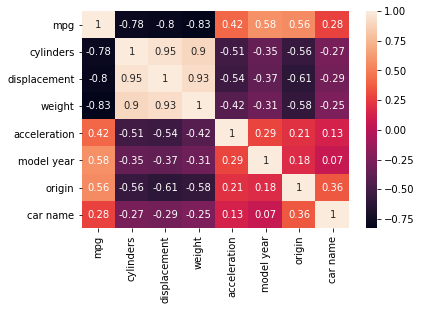

In [0]:
import seaborn as sns
correlation_matrix=cars.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)
#From the correlation matrix identify strongest correlators to mpg

Text(0, 0.5, 'mpg')

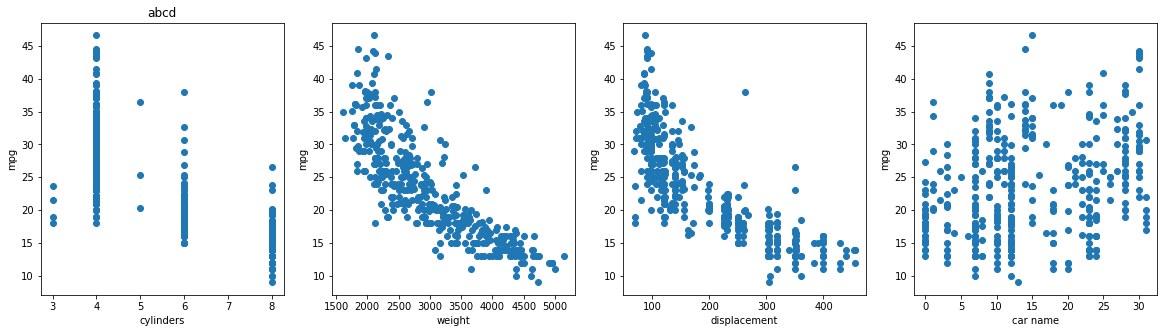

In [0]:
#Strong correlation of mpg with cylinder, displacement and weight very small correlation with brand name
import matplotlib.pyplot as plt
plt.figure(figsize = [20,5])
plt.subplot(1,4,1)
plt.scatter(cars['cylinders'],cars['mpg'])
plt.xlabel('cylinders')
plt.ylabel('mpg')
plt.title('abcd')


plt.subplot(1,4,2)
plt.scatter(cars['weight'],cars['mpg'])
plt.xlabel('weight')
plt.ylabel('mpg')

plt.subplot(1,4,3)
plt.scatter(cars['displacement'],cars['mpg'])
plt.xlabel('displacement')
plt.ylabel('mpg')

plt.subplot(1,4,4)
plt.scatter(cars['car name'],cars['mpg'])
plt.xlabel('car name')
plt.ylabel('mpg')


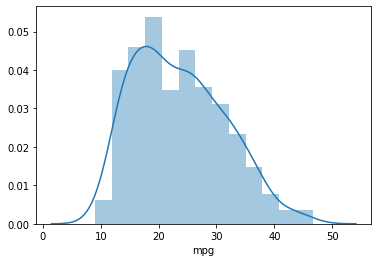

In [0]:
#Distribution of mpg
sns.distplot(cars['mpg'])

In [0]:
#Create the training set
#Shuffle and copy 200 rows. Extract the mpg row as the target (train_sety)
from sklearn.utils import shuffle
cars = shuffle(cars)
train_Set = cars[:200]
train_sety = train_Set['mpg'];
train_setx = train_Set.drop(columns = ['mpg'])

In [0]:
#Create the test set
#copy alls rows after 200. Extract the mpg row as the target (test_sety)
test_Set = cars[200:]
test_sety = test_Set['mpg'];
test_setx = test_Set.drop(columns = ['mpg'])

In [0]:
import random
random.seed(1)
theta0 = random.uniform(-1,1);
theta1 = random.uniform(-1,1);
theta2 = random.uniform(-1,1);

In [0]:
import numpy as np
X1 = train_setx['weight'];
X2 = np.square(train_setx['weight'])

M1= np.mean(X1);
S1 = np.std(X1);
X1 = (X1 - M1)/S1;

M2= np.mean(X2);
S2 = np.std(X2);
X2 = (X2 - M2)/S2;

Y = train_sety
L = len(X1)
alpha = 0.5;

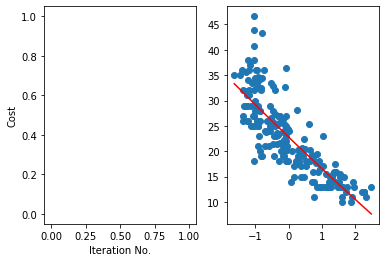

Error =  635.0249222233653 theta0 =  22.879 theta1 =  -6.930041186042524 theta2 =  0.6558206146609902 



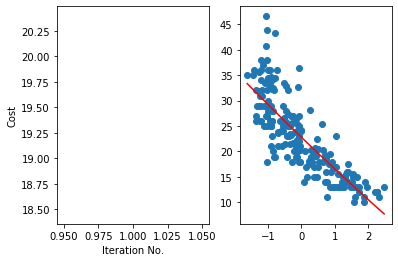

Error =  19.424315745462202 theta0 =  22.878999999999998 theta1 =  -7.057250382832754 theta2 =  0.7819764271528409 



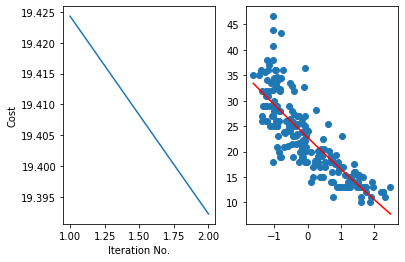

Error =  19.392218276688705 theta0 =  22.878999999999998 theta1 =  -7.182361533811276 theta2 =  0.9060515671721066 



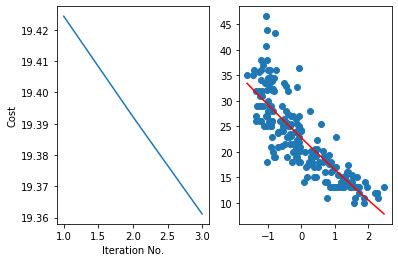

Error =  19.36117083621873 theta0 =  22.878999999999998 theta1 =  -7.3054092417925025 theta2 =  1.0280803509968293 



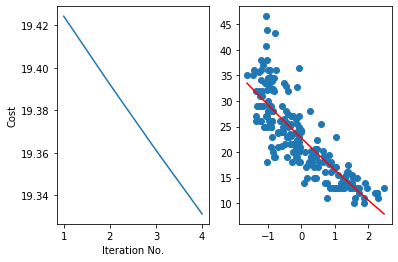

Error =  19.33113907369756 theta0 =  22.878999999999998 theta1 =  -7.426427538890835 theta2 =  1.1480965289308522 



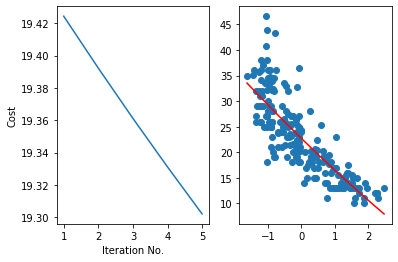

Error =  19.30208976249909 theta0 =  22.878999999999998 theta1 =  -7.545449895933152 theta2 =  1.2661332946383599 



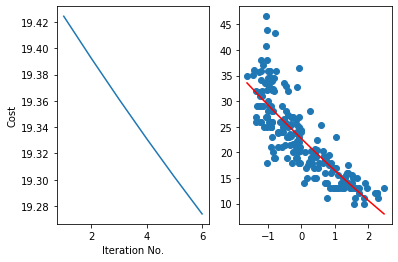

Error =  19.27399076296449 theta0 =  22.878999999999998 theta1 =  -7.662509231716055 theta2 =  1.382223294324473 



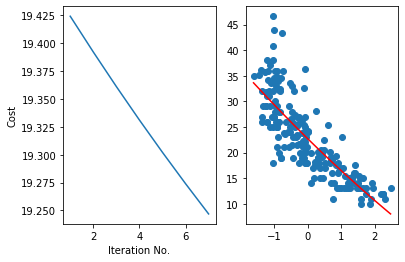

Error =  19.246810986843435 theta0 =  22.878999999999998 theta1 =  -7.777637922110436 theta2 =  1.49639863576442 



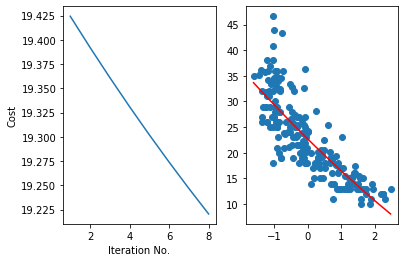

Error =  19.22052036289858 theta0 =  22.878999999999998 theta1 =  -7.890867809015887 theta2 =  1.6086908971837972 



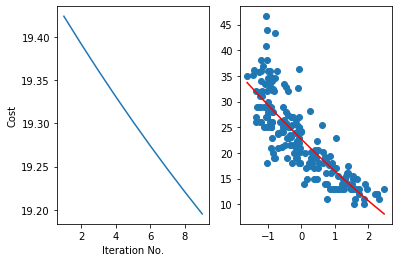

Error =  19.195089803635284 theta0 =  22.878999999999998 theta1 =  -8.00223020916742 theta2 =  1.719131135992366 



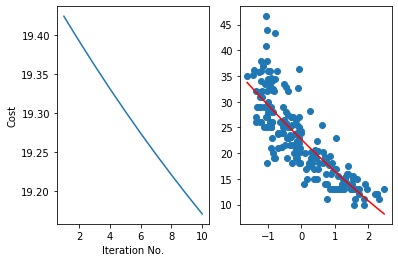

Error =  19.170491173119675 theta0 =  22.878999999999998 theta1 =  -8.111755922796949 theta2 =  1.8277498973738087 



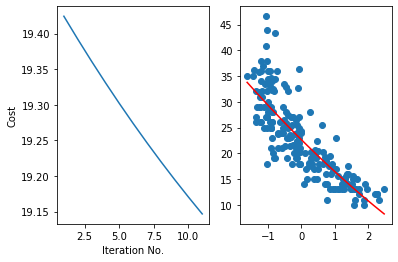

Error =  19.14669725584958 theta0 =  22.878999999999998 theta1 =  -8.219475242151907 theta2 =  1.9345772227338063 



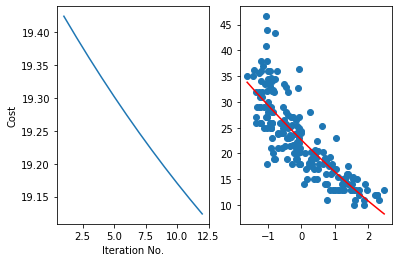

Error =  19.123681726643717 theta0 =  22.878999999999998 theta1 =  -8.325417959873372 theta2 =  2.039642658008787 



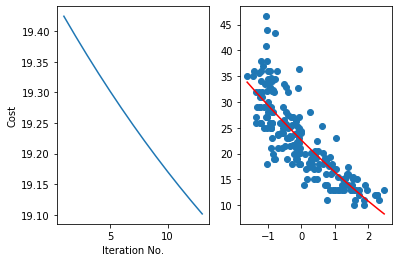

Error =  19.101419121515985 theta0 =  22.878999999999998 theta1 =  -8.42961337723602 theta2 =  2.142975261837648 



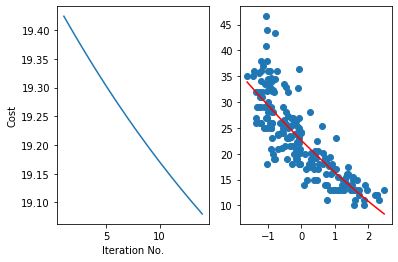

Error =  19.079884809502552 theta0 =  22.878999999999998 theta1 =  -8.532090312252166 theta2 =  2.2446036135986844 



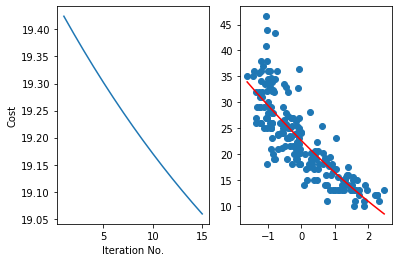

Error =  19.05905496541059 theta0 =  22.878999999999998 theta1 =  -8.63287710764215 theta2 =  2.3445558213139837 



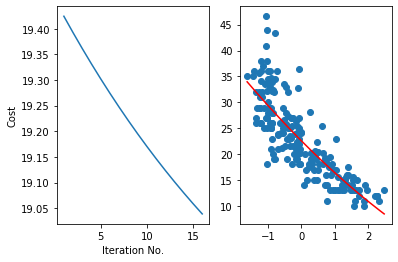

Error =  19.03890654345844 theta0 =  22.878999999999998 theta1 =  -8.732001638673275 theta2 =  2.44285952942344 



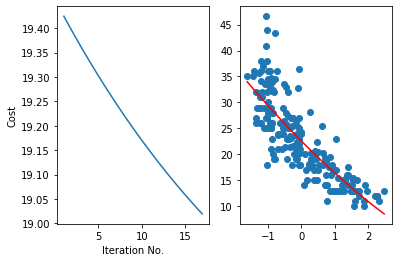

Error =  19.019417251778233 theta0 =  22.878999999999998 theta1 =  -8.829491320869451 theta2 =  2.5395419264305685 



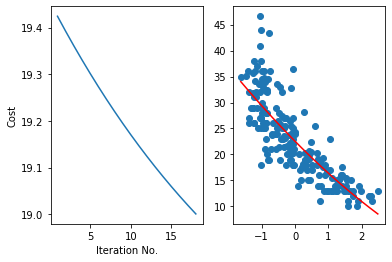

Error =  19.000565527752478 theta0 =  22.878999999999998 theta1 =  -8.925373117593685 theta2 =  2.6346297524221964 



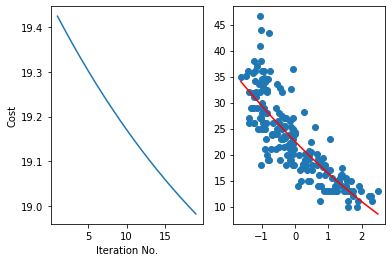

Error =  18.982330514157596 theta0 =  22.878999999999998 theta1 =  -9.019673547505517 theta2 =  2.7281493064641555 



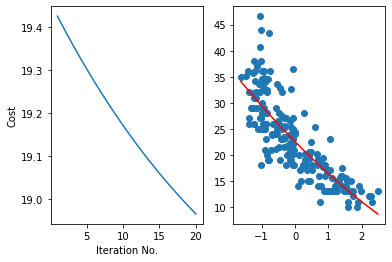

Error =  18.964692036087836 theta0 =  22.878999999999998 theta1 =  -9.112418691895462 theta2 =  2.820126453874979 



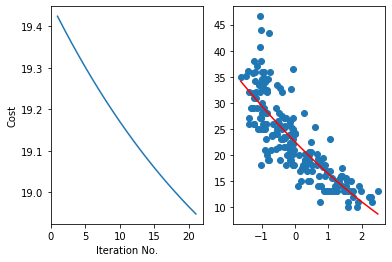

Error =  18.947630578634087 theta0 =  22.878999999999998 theta1 =  -9.203634201898481 theta2 =  2.9105866333796517 



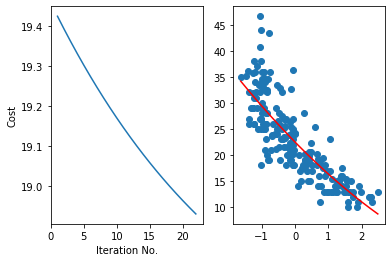

Error =  18.93112726529296 theta0 =  22.878999999999998 theta1 =  -9.293345305588486 theta2 =  2.999554864145358 



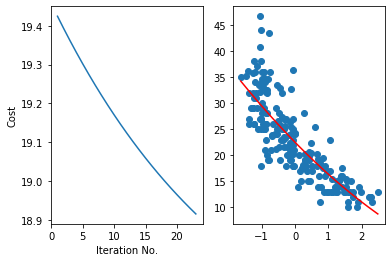

Error =  18.9151638370821 theta0 =  22.878999999999998 theta1 =  -9.381576814955835 theta2 =  3.087055752701201 



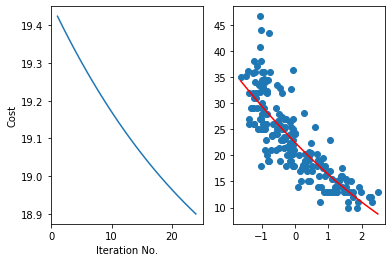

Error =  18.8997226323388 theta0 =  22.878999999999998 theta1 =  -9.468353132769746 theta2 =  3.1731134997437933 



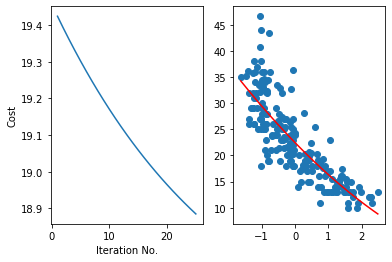

Error =  18.884786567179415 theta0 =  22.878999999999998 theta1 =  -9.55369825932753 theta2 =  3.2577519068306 



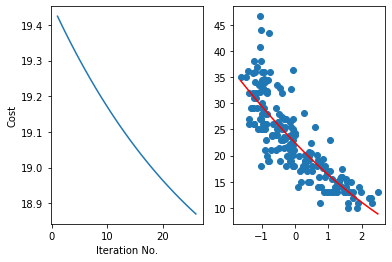

Error =  18.870339116598053 theta0 =  22.878999999999998 theta1 =  -9.637635799092518 theta2 =  3.3409943829628936 



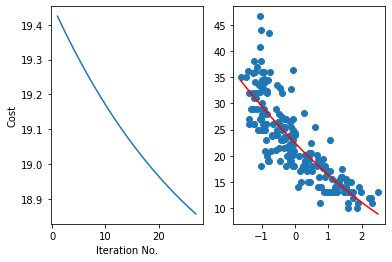

Error =  18.85636429618362 theta0 =  22.878999999999998 theta1 =  -9.720188967222494 theta2 =  3.4228639510601386 



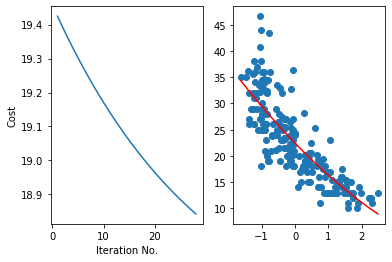

Error =  18.842846644434896 theta0 =  22.878999999999998 theta1 =  -9.801380595990471 theta2 =  3.503383254327585 



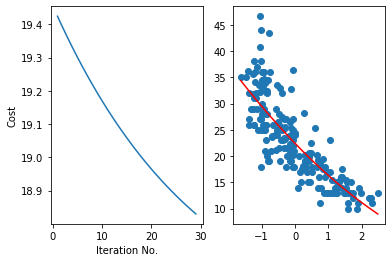

Error =  18.82977120565422 theta0 =  22.878999999999998 theta1 =  -9.881233141099557 theta2 =  3.582574562518854 



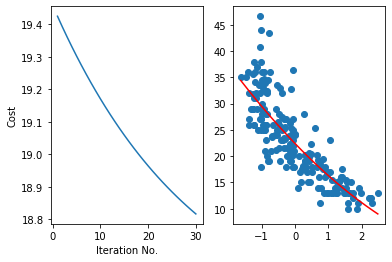

Error =  18.81712351340078 theta0 =  22.878999999999998 theta1 =  -9.959768687893682 theta2 =  3.6604597780952295 



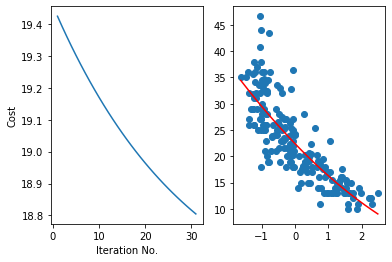

Error =  18.804889574485152 theta0 =  22.878999999999998 theta1 =  -10.037008957465883 theta2 =  3.737060442283363 



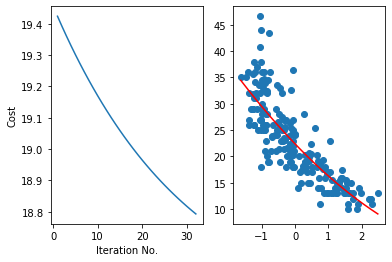

Error =  18.7930558534875 theta0 =  22.878999999999998 theta1 =  -10.112975312665851 theta2 =  3.812397741033075 



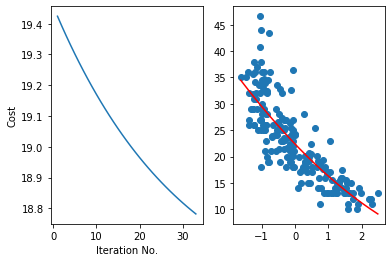

Error =  18.78160925778223 theta0 =  22.878999999999998 theta1 =  -10.187688764008398 theta2 =  3.886492510876895 



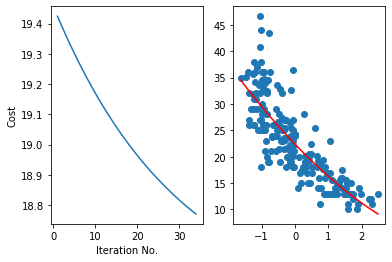

Error =  18.770537123052506 theta0 =  22.878999999999998 theta1 =  -10.261169975484467 theta2 =  3.959365244692954 



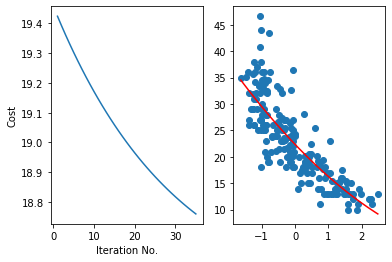

Error =  18.75982719927869 theta0 =  22.878999999999998 theta1 =  -10.333439270276315 theta2 =  4.031036097372836 



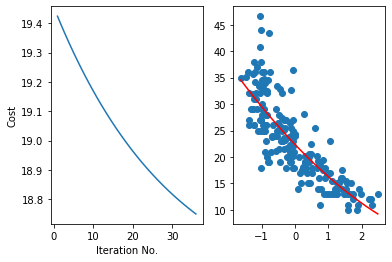

Error =  18.749467637185113 theta0 =  22.878999999999998 theta1 =  -10.404516636378423 theta2 =  4.101524891395949 



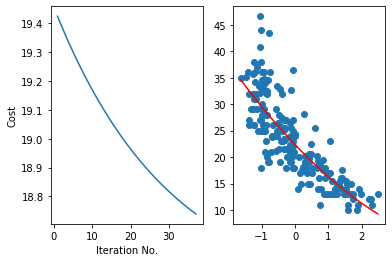

Error =  18.739446975130267 theta0 =  22.878999999999998 theta1 =  -10.474421732125709 theta2 =  4.170851122311958 



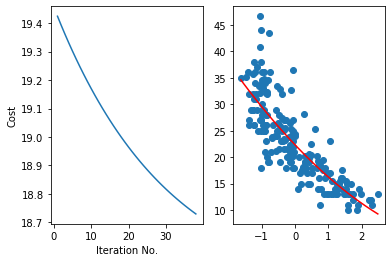

Error =  18.729754126425814 theta0 =  22.878999999999998 theta1 =  -10.543173891630568 theta2 =  4.239033964132801 



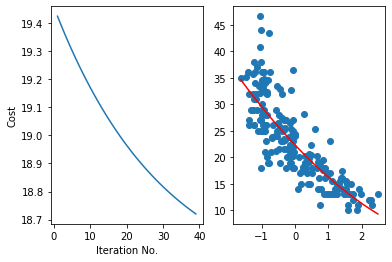

Error =  18.720378367070463 theta0 =  22.878999999999998 theta1 =  -10.610792130130227 theta2 =  4.306092274635767 



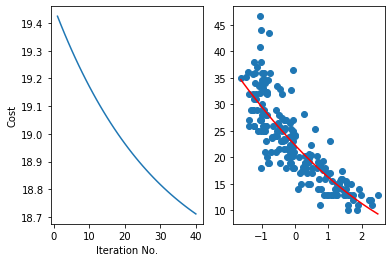

Error =  18.711309323885153 theta0 =  22.878999999999998 theta1 =  -10.677295149245918 theta2 =  4.372044600579118 



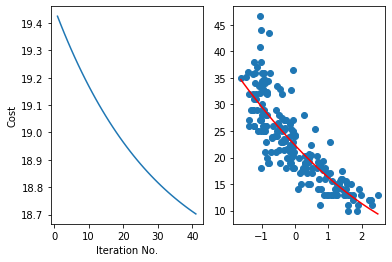

Error =  18.70253696303632 theta0 =  22.878999999999998 theta1 =  -10.742701342155312 theta2 =  4.436909182831689 



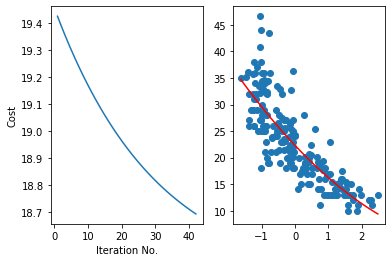

Error =  18.694051578934616 theta0 =  22.878999999999998 theta1 =  -10.807028798679635 theta2 =  4.500703961417882 



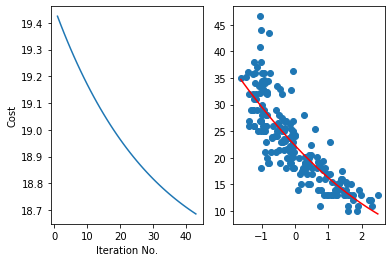

Error =  18.685843783496868 theta0 =  22.878999999999998 theta1 =  -10.870295310286892 theta2 =  4.563446580479459 



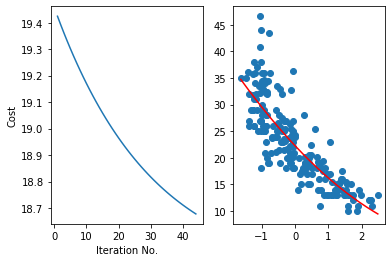

Error =  18.677904495759208 theta0 =  22.878999999999998 theta1 =  -10.932518375012569 theta2 =  4.625154393155497 



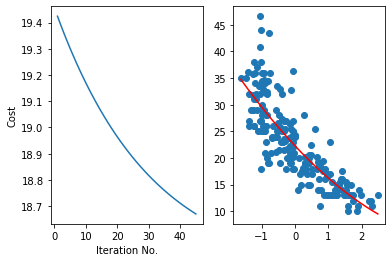

Error =  18.670224931830088 theta0 =  22.878999999999998 theta1 =  -10.993715202299182 theta2 =  4.685844466381862 



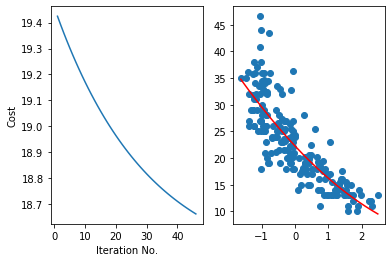

Error =  18.66279659517192 theta0 =  22.878999999999998 theta1 =  -11.053902717756005 theta2 =  4.745533585611522 



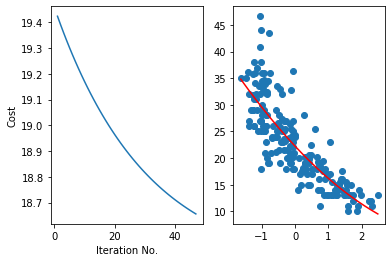

Error =  18.655611267200648 theta0 =  22.878999999999998 theta1 =  -11.113097567840295 theta2 =  4.80423825945701 



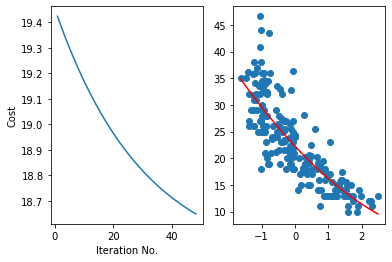

Error =  18.648660998192835 theta0 =  22.878999999999998 theta1 =  -11.171316124461317 theta2 =  4.861974724256322 



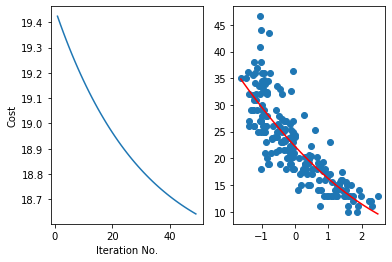

Error =  18.641938098490282 theta0 =  22.878999999999998 theta1 =  -11.228574489508425 theta2 =  4.918758948563505 



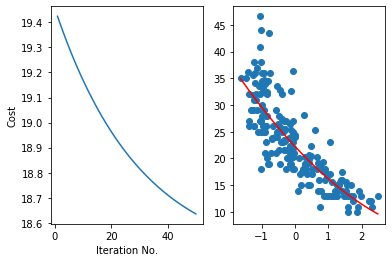

Error =  18.635435129992246 theta0 =  22.878999999999998 theta1 =  -11.28488849930447 theta2 =  4.9746066375651825 



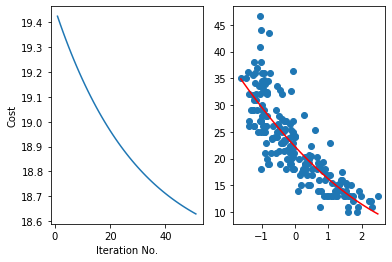

Error =  18.629144897926107 theta0 =  22.878999999999998 theta1 =  -11.340273728985757 theta2 =  5.029533237424252 



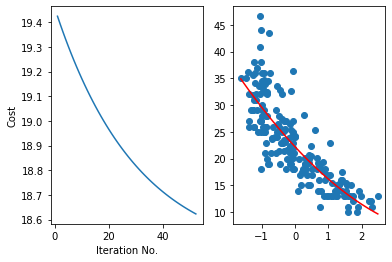

Error =  18.623060442887176 theta0 =  22.878999999999998 theta1 =  -11.394745496809762 theta2 =  5.083553939551918 



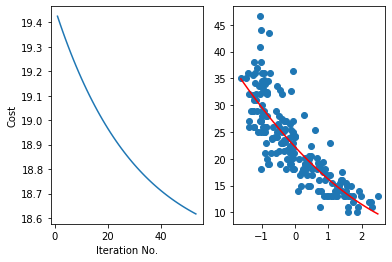

Error =  18.617175033138942 theta0 =  22.878999999999998 theta1 =  -11.448318868391803 theta2 =  5.136683684809294 



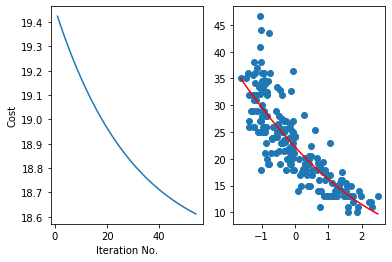

Error =  18.61148215716516 theta0 =  22.878999999999998 theta1 =  -11.50100866087184 theta2 =  5.1889371676396845 



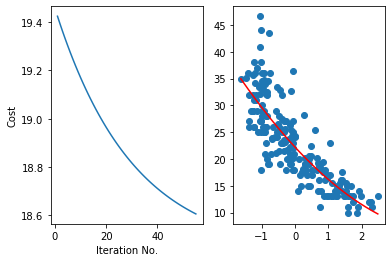

Error =  18.605975516465662 theta0 =  22.878999999999998 theta1 =  -11.552829447012542 theta2 =  5.240328840132729 



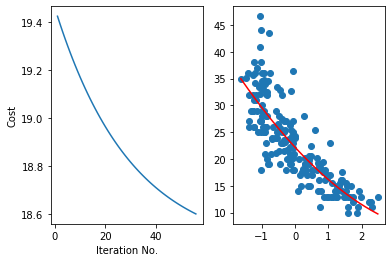

Error =  18.600649018587788 theta0 =  22.878999999999998 theta1 =  -11.603795559229775 theta2 =  5.290872916021507 



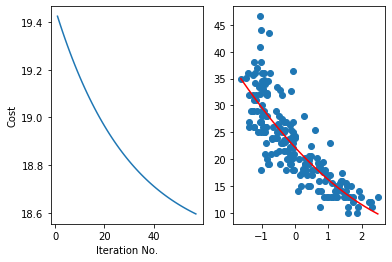

Error =  18.5954967703858 theta0 =  22.878999999999998 theta1 =  -11.653921093556617 theta2 =  5.340583374613732 



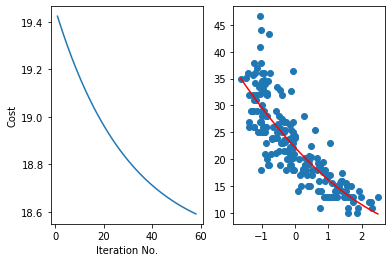

Error =  18.5905130715008 theta0 =  22.878999999999998 theta1 =  -11.703219913541982 theta2 =  5.38947396465809 



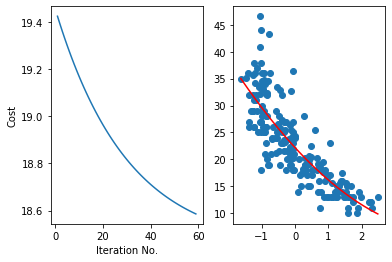

Error =  18.585692408053966 theta0 =  22.878999999999998 theta1 =  -11.751705654084963 theta2 =  5.437558208146833 



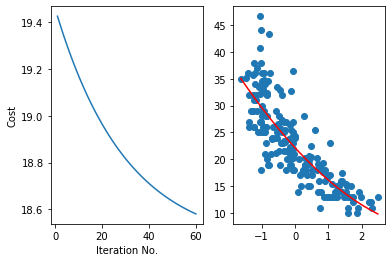

Error =  18.581029446546083 theta0 =  22.878999999999998 theta1 =  -11.799391725205918 theta2 =  5.484849404055636 



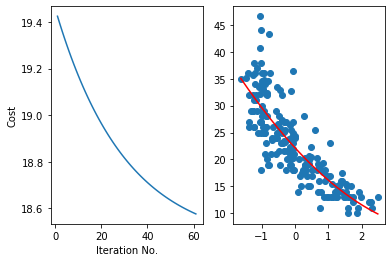

Error =  18.57651902795664 theta0 =  22.878999999999998 theta1 =  -11.846291315755368 theta2 =  5.531360632021784 



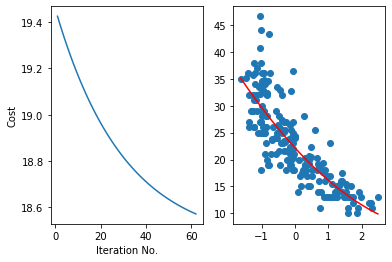

Error =  18.572156162036016 theta0 =  22.878999999999998 theta1 =  -11.89241739706173 theta2 =  5.577104755961698 



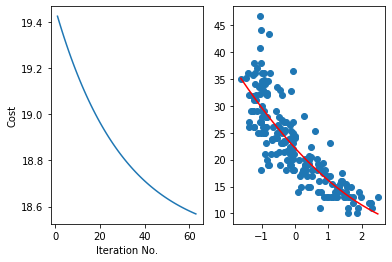

Error =  18.56793602178431 theta0 =  22.878999999999998 theta1 =  -11.937782726518876 theta2 =  5.622094427628789 



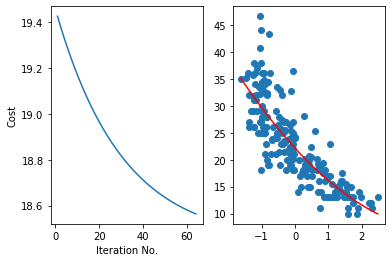

Error =  18.56385393811084 theta0 =  22.878999999999998 theta1 =  -11.982399851114536 theta2 =  5.6663420901126385 



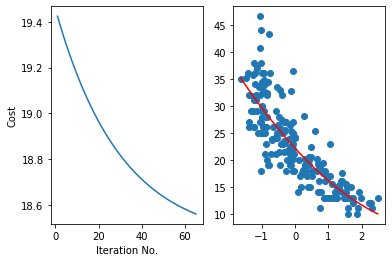

Error =  18.55990539466837 theta0 =  22.878999999999998 theta1 =  -12.026281110900495 theta2 =  5.709859981280463 



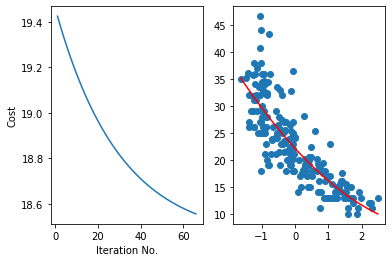

Error =  18.55608602285627 theta0 =  22.878999999999998 theta1 =  -12.069438642405563 theta2 =  5.752660137161824 



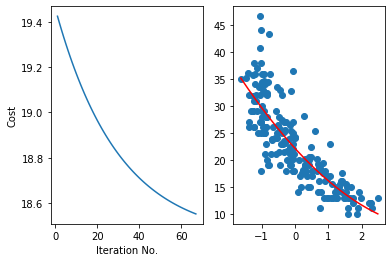

Error =  18.552391596987192 theta0 =  22.878999999999998 theta1 =  -12.11188438199226 theta2 =  5.794754395277511 



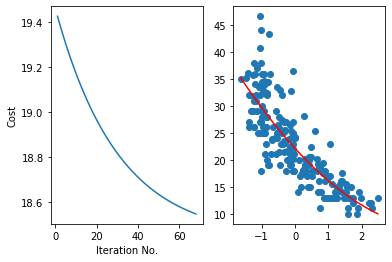

Error =  18.54881802961182 theta0 =  22.878999999999998 theta1 =  -12.153630069158128 theta2 =  5.836154397913525 



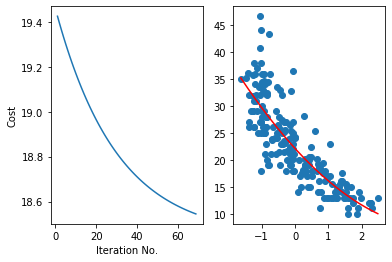

Error =  18.545361366996605 theta0 =  22.878999999999998 theta1 =  -12.194687249782604 theta2 =  5.876871595341056 



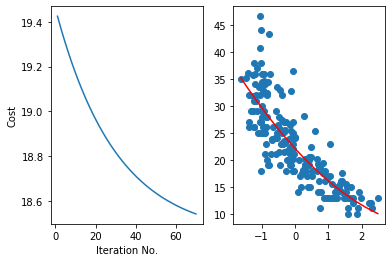

Error =  18.542017784749426 theta0 =  22.878999999999998 theta1 =  -12.23506727932034 theta2 =  5.916917248983366 



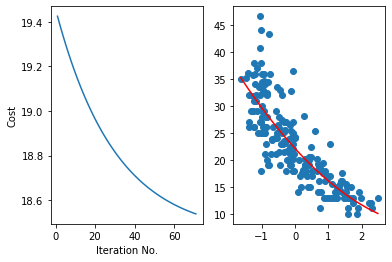

Error =  18.538783583588316 theta0 =  22.878999999999998 theta1 =  -12.274781325941857 theta2 =  5.956302434530435 



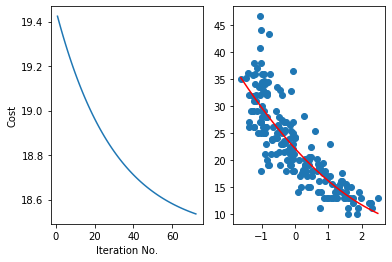

Error =  18.535655185248682 theta0 =  22.878999999999998 theta1 =  -12.313840373622396 theta2 =  5.99503804500223 



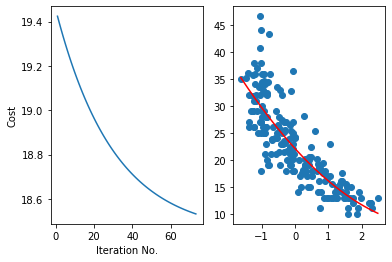

Error =  18.53262912852435 theta0 =  22.878999999999998 theta1 =  -12.352255225179832 theta2 =  6.03313479376147 



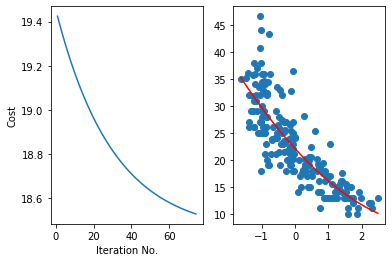

Error =  18.529702065438148 theta0 =  22.878999999999998 theta1 =  -12.390036505262476 theta2 =  6.070603217476682 



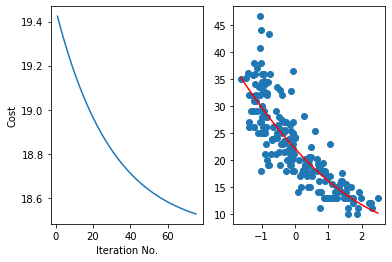

Error =  18.526870757537758 theta0 =  22.878999999999998 theta1 =  -12.427194663287608 theta2 =  6.107453679036402 



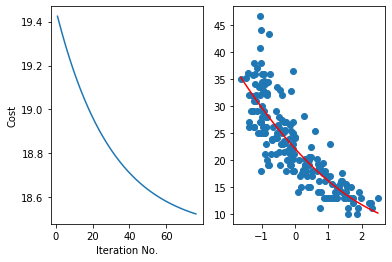

Error =  18.524132072312778 theta0 =  22.878999999999998 theta1 =  -12.46373997633154 theta2 =  6.143696370415303 



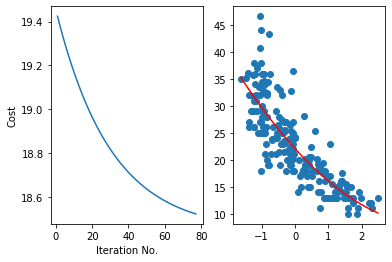

Error =  18.521482979728905 theta0 =  22.878999999999998 theta1 =  -12.499682551972013 theta2 =  6.179341315493063 



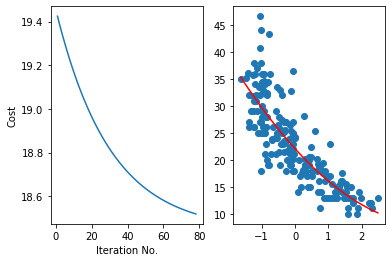

Error =  18.51892054887564 theta0 =  22.878999999999998 theta1 =  -12.535032331083718 theta2 =  6.214398372826728 



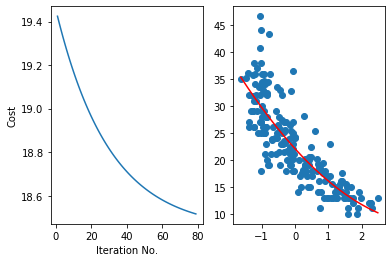

Error =  18.516441944723503 theta0 =  22.878999999999998 theta1 =  -12.569799090587711 theta2 =  6.248877238377367 



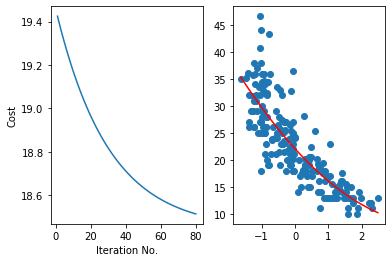

Error =  18.514044424987432 theta0 =  22.878999999999998 theta1 =  -12.603992446155475 theta2 =  6.282787448191735 



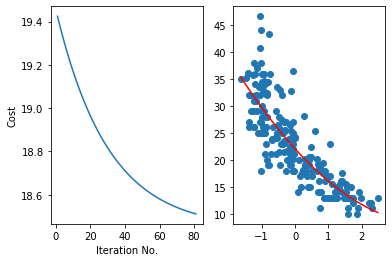

Error =  18.511725337092795 theta0 =  22.878999999999998 theta1 =  -12.637621854868396 theta2 =  6.316138381039735 



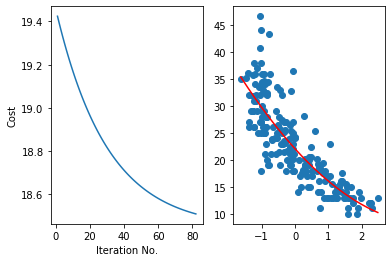

Error =  18.50948211524058 theta0 =  22.878999999999998 theta1 =  -12.67069661783336 theta2 =  6.348939261008353 



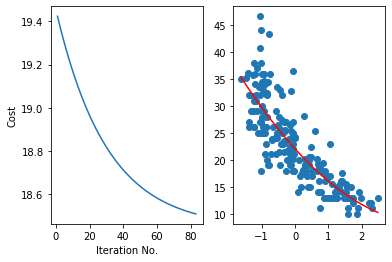

Error =  18.50731227756868 theta0 =  22.878999999999998 theta1 =  -12.70322588275524 theta2 =  6.381199160052833 



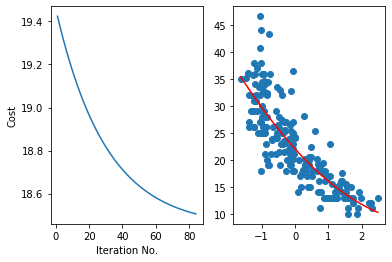

Error =  18.50521342340596 theta0 =  22.878999999999998 theta1 =  -12.73521864646691 theta2 =  6.4129270005057615 



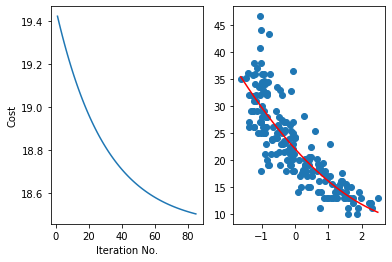

Error =  18.50318323061624 theta0 =  22.878999999999998 theta1 =  -12.766683757417587 theta2 =  6.444131557544783 



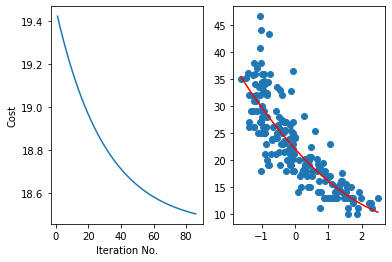

Error =  18.501219453029105 theta0 =  22.878999999999998 theta1 =  -12.797629918120084 theta2 =  6.474821461619602 



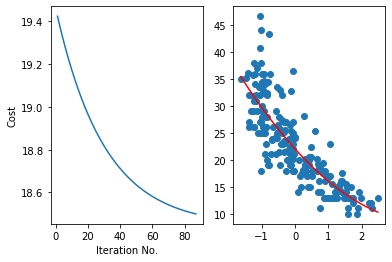

Error =  18.499319917954757 theta0 =  22.878999999999998 theta1 =  -12.82806568755773 theta2 =  6.505005200838965 



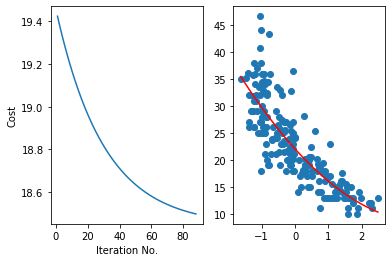

Error =  18.49748252378023 theta0 =  22.878999999999998 theta1 =  -12.857999483551586 theta2 =  6.534691123318275 



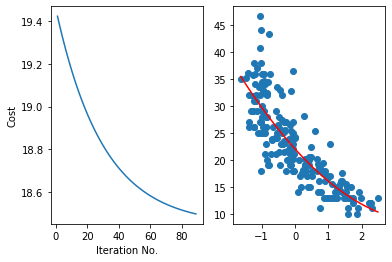

Error =  18.49570523764418 theta0 =  22.878999999999998 theta1 =  -12.88743958508861 theta2 =  6.563887439488483 



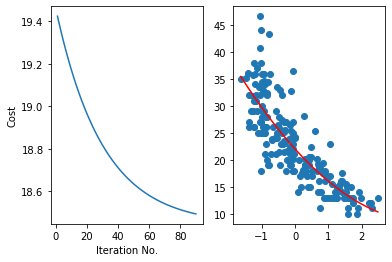

Error =  18.49398609318776 theta0 =  22.878999999999998 theta1 =  -12.916394134611435 theta2 =  6.5926022243669005 



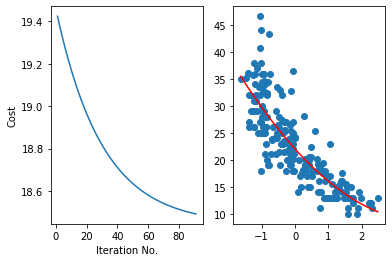

Error =  18.49232318837908 theta0 =  22.878999999999998 theta1 =  -12.944871140270381 theta2 =  6.620843419790558 



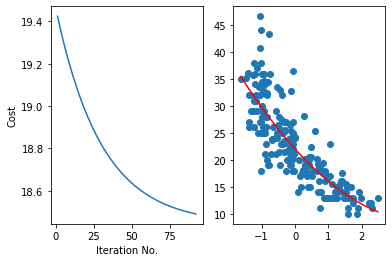

Error =  18.490714683408818 theta0 =  22.878999999999998 theta1 =  -12.972878478138316 theta2 =  6.6486188366127354 



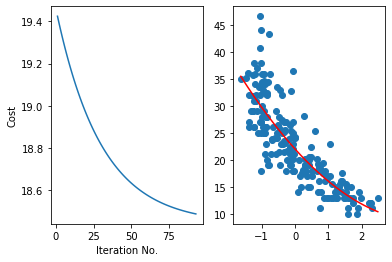

Error =  18.48915879865472 theta0 =  22.878999999999998 theta1 =  -13.000423894388996 theta2 =  6.675936156863261 



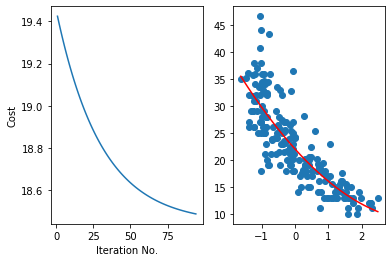

Error =  18.487653812712633 theta0 =  22.878999999999998 theta1 =  -13.02751500743948 theta2 =  6.702802935873179 



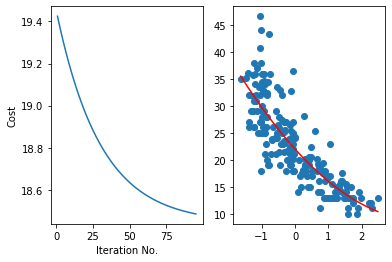

Error =  18.486198060491944 theta0 =  22.878999999999998 theta1 =  -13.054159310057193 theta2 =  6.729226604364375 



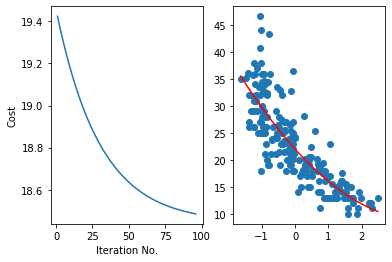

Error =  18.484789931373435 theta0 =  22.878999999999998 theta1 =  -13.080364171432265 theta2 =  6.755214470504746 



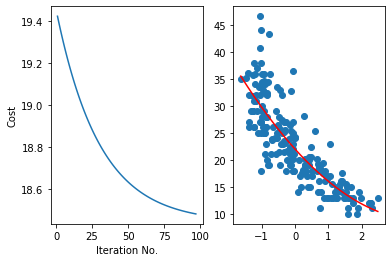

Error =  18.48342786742722 theta0 =  22.878999999999998 theta1 =  -13.106136839215665 theta2 =  6.780773721929459 



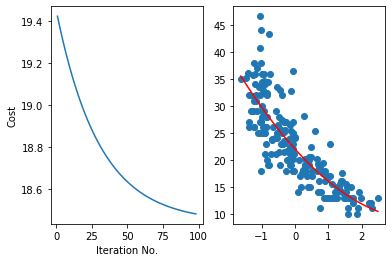

Error =  18.482110361689152 theta0 =  22.878999999999998 theta1 =  -13.131484441523739 theta2 =  6.805911427728896 



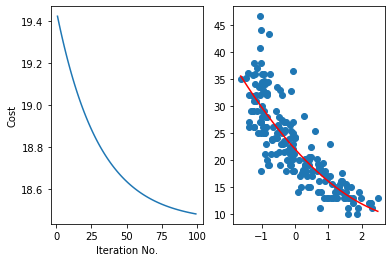

Error =  18.480835956493525 theta0 =  22.878999999999998 theta1 =  -13.156413988909677 theta2 =  6.830634540403785 



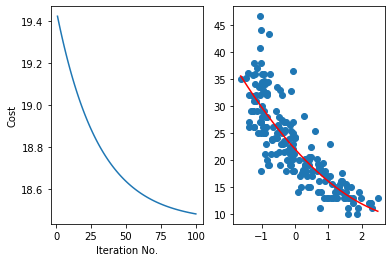

Error =  18.479603241860318 theta0 =  22.878999999999998 theta1 =  -13.180932376302463 theta2 =  6.8549498977881065 



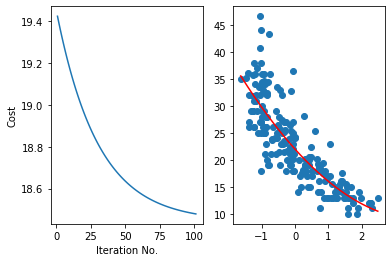

Error =  18.478410853935255 theta0 =  22.878999999999998 theta1 =  -13.205046384913864 theta2 =  6.87886422494028 



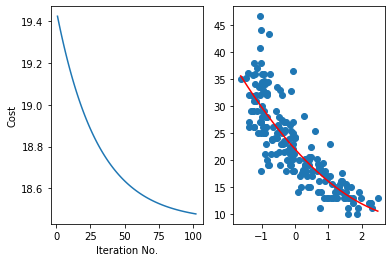

Error =  18.4772574734808 theta0 =  22.878999999999998 theta1 =  -13.228762684113939 theta2 =  6.902384136003149 



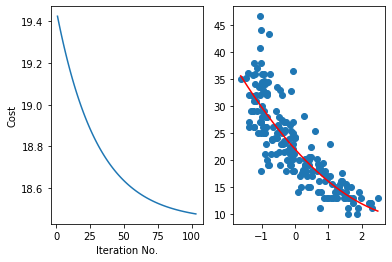

Error =  18.476141824416647 theta0 =  22.878999999999998 theta1 =  -13.25208783327564 theta2 =  6.925516136033308 



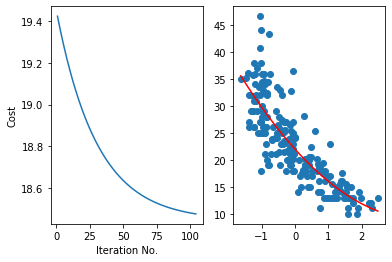

Error =  18.475062672407834 theta0 =  22.878999999999998 theta1 =  -13.27502828358898 theta2 =  6.948266622800242 



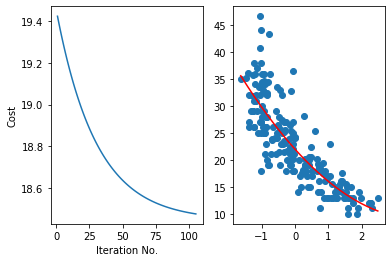

Error =  18.474018823499122 theta0 =  22.878999999999998 theta1 =  -13.297590379845278 theta2 =  6.970641888555801 



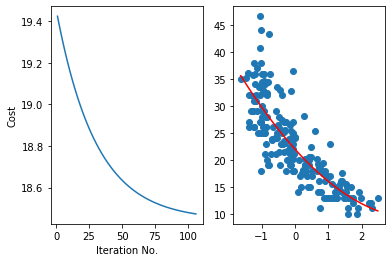

Error =  18.473009122794014 theta0 =  22.878999999999998 theta1 =  -13.319780362191983 theta2 =  6.992648121774494 



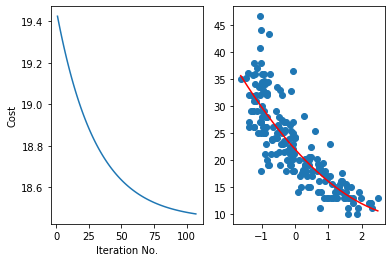

Error =  18.472032453176993 theta0 =  22.878999999999998 theta1 =  -13.34160436785855 theta2 =  7.014291408865068 



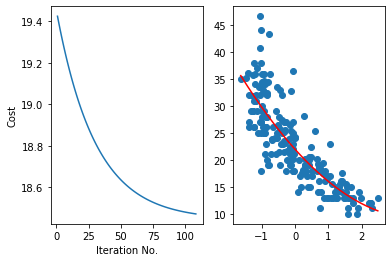

Error =  18.471087734077578 theta0 =  22.878999999999998 theta1 =  -13.363068432853852 theta2 =  7.035577735853876 



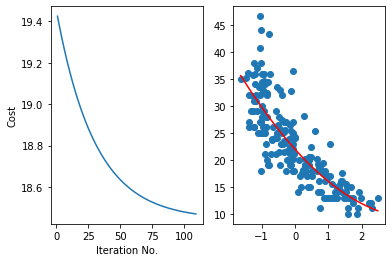

Error =  18.470173920274778 theta0 =  22.878999999999998 theta1 =  -13.38417849363561 theta2 =  7.056512990040461 



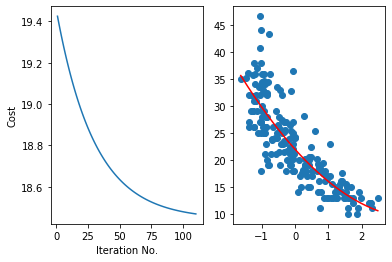

Error =  18.469290000740706 theta0 =  22.878999999999998 theta1 =  -13.40494038875226 theta2 =  7.077102961625856 



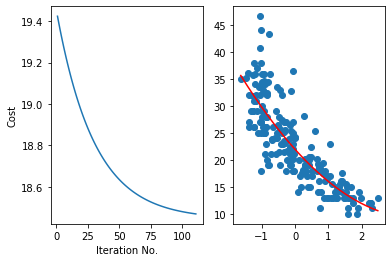

Error =  18.468434997521985 theta0 =  22.878999999999998 theta1 =  -13.425359860457778 theta2 =  7.097353345314009 



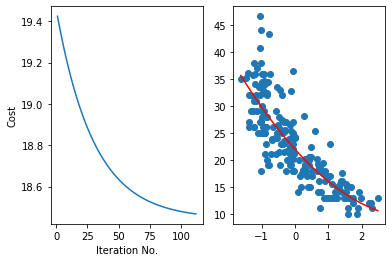

Error =  18.467607964657738 theta0 =  22.878999999999998 theta1 =  -13.445442556299835 theta2 =  7.117269741886808 



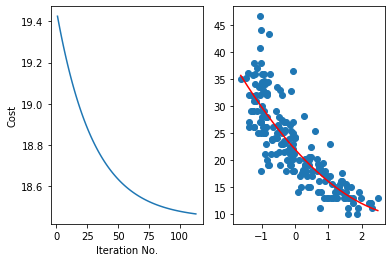

Error =  18.466807987133006 theta0 =  22.878999999999998 theta1 =  -13.46519403068179 theta2 =  7.136857659753128 



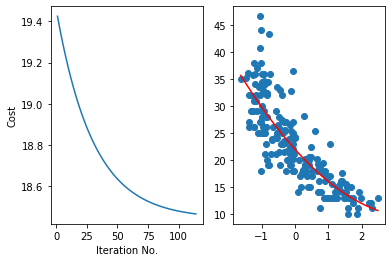

Error =  18.46603417986641 theta0 =  22.878999999999998 theta1 =  -13.484619746398902 theta2 =  7.156122516472325 



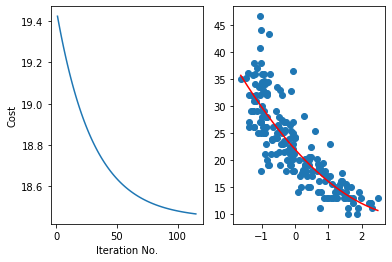

Error =  18.465285686730876 theta0 =  22.878999999999998 theta1 =  -13.503725076149212 theta2 =  7.175069640252611 



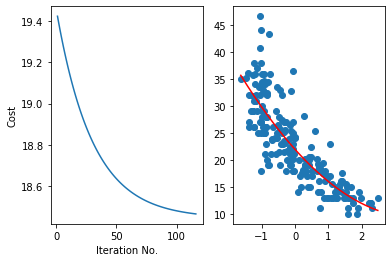

Error =  18.464561679606465 theta0 =  22.878999999999998 theta1 =  -13.522515304019507 theta2 =  7.193704271424703 



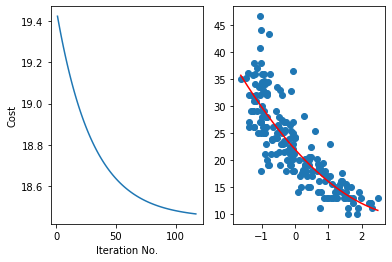

Error =  18.463861357464125 theta0 =  22.878999999999998 theta1 =  -13.54099562694677 theta2 =  7.212031563891184 



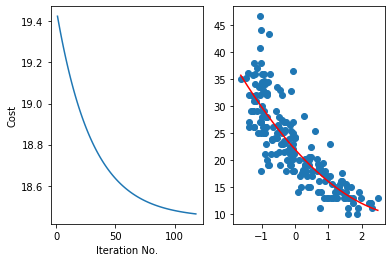

Error =  18.463183945479475 theta0 =  22.878999999999998 theta1 =  -13.55917115615554 theta2 =  7.230056586551949 



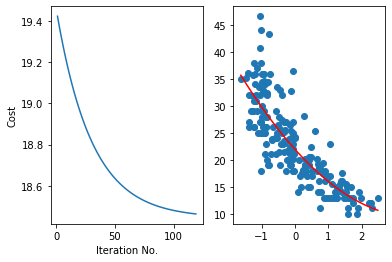

Error =  18.46252869417554 theta0 =  22.878999999999998 theta1 =  -13.577046918571542 theta2 =  7.247784324706139 



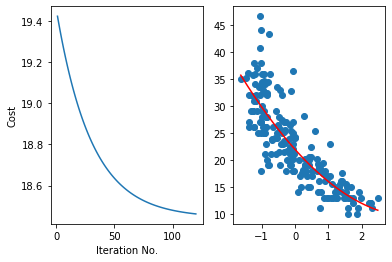

Error =  18.461894878593522 theta0 =  22.878999999999998 theta1 =  -13.594627858212036 theta2 =  7.265219681430969 



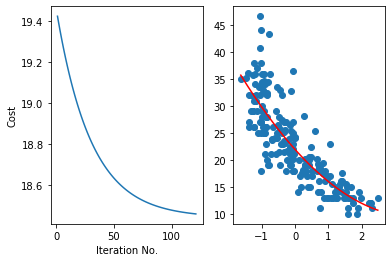

Error =  18.461281797490752 theta0 =  22.878999999999998 theta1 =  -13.611918837553201 theta2 =  7.282367478937792 



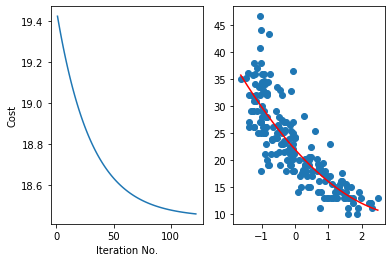

Error =  18.460688772564843 theta0 =  22.878999999999998 theta1 =  -13.62892463887499 theta2 =  7.299232459905819 



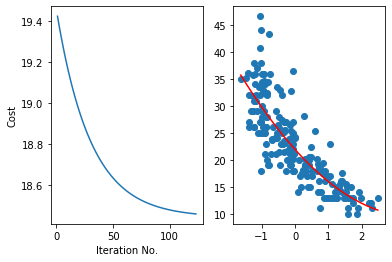

Error =  18.460115147703196 theta0 =  22.878999999999998 theta1 =  -13.645649965583793 theta2 =  7.315819288793829 



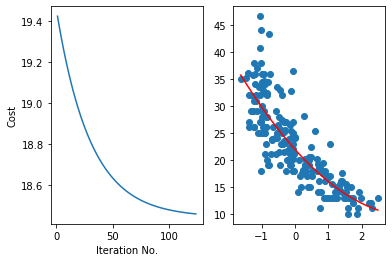

Error =  18.459560288257112 theta0 =  22.878999999999998 theta1 =  -13.662099443513291 theta2 =  7.332132553130249 



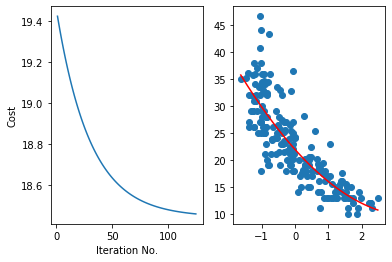

Error =  18.459023580339657 theta0 =  22.878999999999998 theta1 =  -13.678277622203856 theta2 =  7.348176764781959 



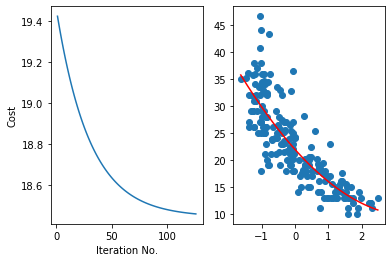

Error =  18.458504430146387 theta0 =  22.878999999999998 theta1 =  -13.694188976160838 theta2 =  7.363956361202166 



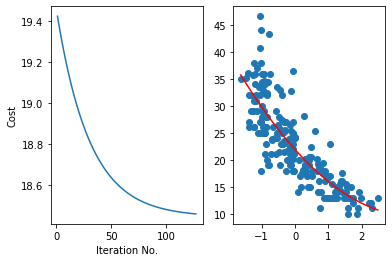

Error =  18.458002263298457 theta0 =  22.878999999999998 theta1 =  -13.709837906092117 theta2 =  7.3794757066577 



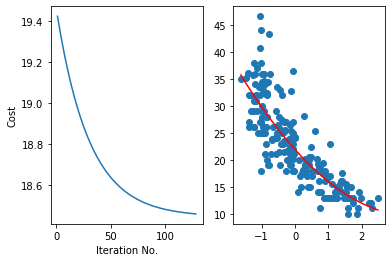

Error =  18.4575165242071 theta0 =  22.878999999999998 theta1 =  -13.725228740125235 theta2 =  7.394739093436071 



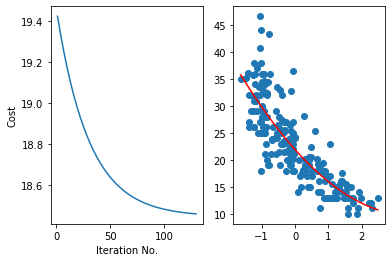

Error =  18.45704667545892 theta0 =  22.878999999999998 theta1 =  -13.740365735004449 theta2 =  7.40975074303261 



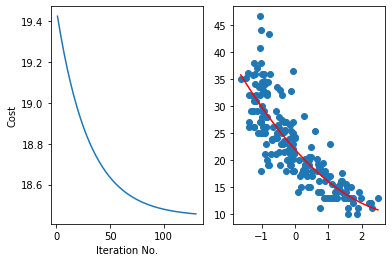

Error =  18.45659219722133 theta0 =  22.878999999999998 theta1 =  -13.755253077268055 theta2 =  7.424514807318046 



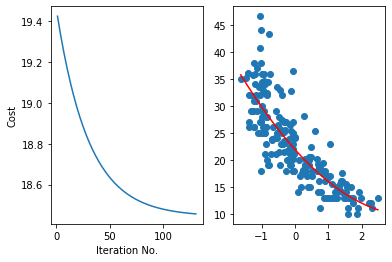

Error =  18.456152586667432 theta0 =  22.878999999999998 theta1 =  -13.769894884406279 theta2 =  7.439035369686799 



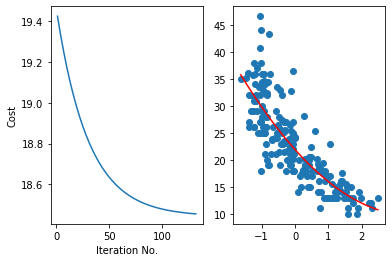

Error =  18.455727357419654 theta0 =  22.878999999999998 theta1 =  -13.784295206000081 theta2 =  7.453316446186369 



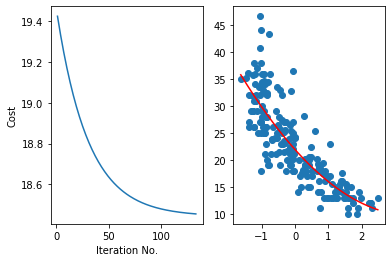

Error =  18.455316039011667 theta0 =  22.878999999999998 theta1 =  -13.79845802484118 theta2 =  7.467361986628072 



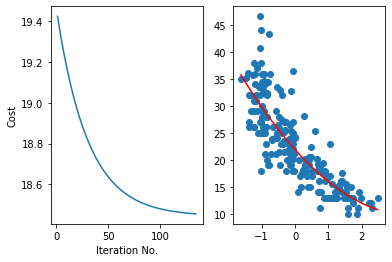

Error =  18.45491817636784 theta0 =  22.878999999999998 theta1 =  -13.812387258033588 theta2 =  7.481175875679463 



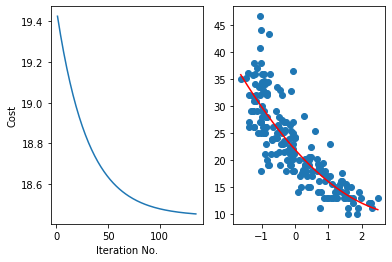

Error =  18.454533329299785 theta0 =  22.878999999999998 theta1 =  -13.826086758077002 theta2 =  7.494761933938748 



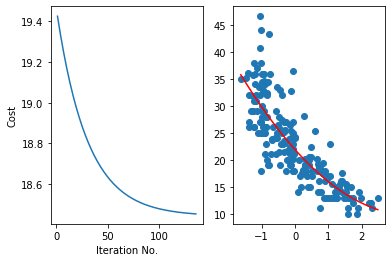

Error =  18.45416107201932 theta0 =  22.878999999999998 theta1 =  -13.83956031393231 theta2 =  7.508123918991477 



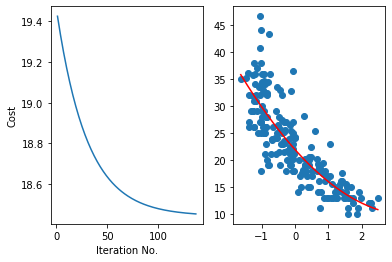

Error =  18.45380099266739 theta0 =  22.878999999999998 theta1 =  -13.852811652069525 theta2 =  7.52126552644979 



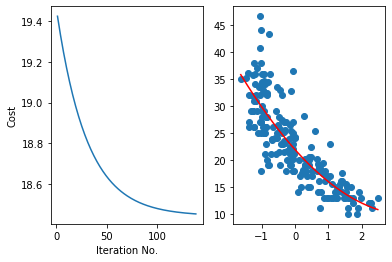

Error =  18.453452692858374 theta0 =  22.878999999999998 theta1 =  -13.865844437498446 theta2 =  7.534190390974552 



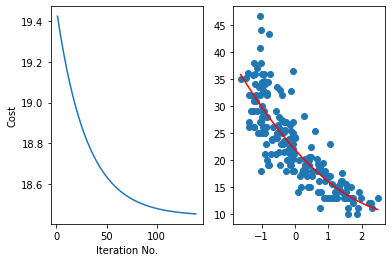

Error =  18.453115787239348 theta0 =  22.878999999999998 theta1 =  -13.878662274782311 theta2 =  7.546902087280605 



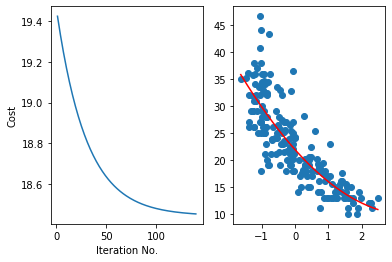

Error =  18.452789903063742 theta0 =  22.878999999999998 theta1 =  -13.891268709034737 theta2 =  7.559404131125457 



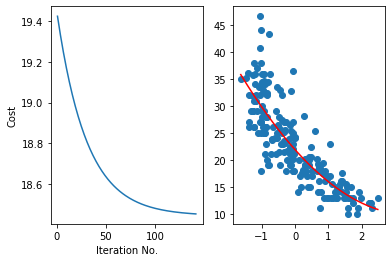

Error =  18.45247467977888 theta0 =  22.878999999999998 theta1 =  -13.90366722690021 theta2 =  7.571699980281652 



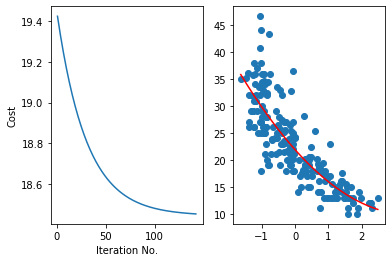

Error =  18.452169768627147 theta0 =  22.878999999999998 theta1 =  -13.915861257518412 theta2 =  7.583793035493113 



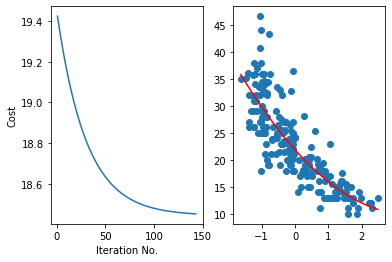

Error =  18.451874832260085 theta0 =  22.878999999999998 theta1 =  -13.927854173472644 theta2 =  7.595686641415707 



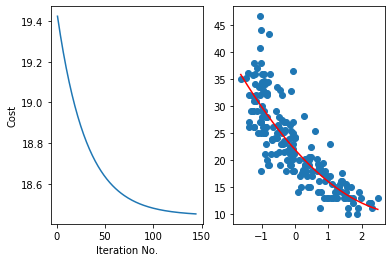

Error =  18.451589544365156 theta0 =  22.878999999999998 theta1 =  -13.939649291722601 theta2 =  7.607384087542299 



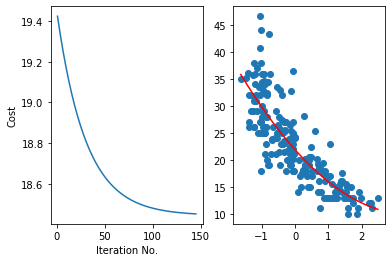

Error =  18.45131358930474 theta0 =  22.878999999999998 theta1 =  -13.951249874521762 theta2 =  7.618888609112547 



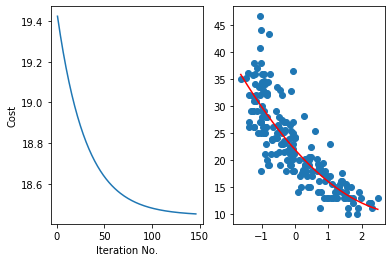

Error =  18.4510466617669 theta0 =  22.878999999999998 theta1 =  -13.962659130319658 theta2 =  7.630203388007696 



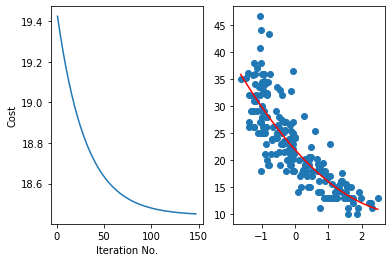

Error =  18.45078846642759 theta0 =  22.878999999999998 theta1 =  -13.973880214649252 theta2 =  7.64133155363061 



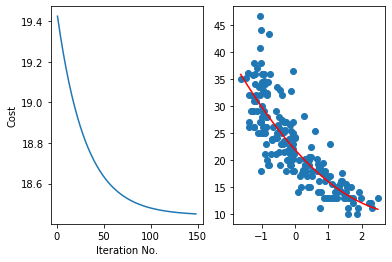

Error =  18.450538717623935 theta0 =  22.878999999999998 theta1 =  -13.984916230999687 theta2 =  7.652276183771294 



In [0]:
iteration_Nos = range(1, 150)
err_F = [None] * len(iteration_Nos)

for i in iteration_Nos:
    h = ((1/L)*np.sum(np.square(theta0 + theta1*X1 + theta2*X2 - Y)))
    err_F[i-1] = h;
    theta0 = theta0 - (alpha/L)*np.sum((2*(theta0 + theta1*X1 + theta2*X2 - Y)));
    theta1 = theta1 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 - Y),X1));
    theta2 = theta2 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 - Y),X2));

    plt.clf()
    plt.subplot(1,2,1);
    plt.plot(range(1, i), err_F[1:i])
    plt.xlabel('Iteration No.')
    plt.ylabel('Cost')
    
    plt.subplot(1,2,2);
    plt.scatter(X1, Y)
    X_R = np.arange(np.min(train_setx['weight']),np.max(train_setx['weight']), 0.1);
    # create a x axis with  min to max
    X_R2 = np.square(X_R);
    X_R = (X_R-M1)/S1;
    X_R2 = (X_R2 - M2)/S2;
    plt.plot(X_R, theta0 + theta1*X_R+ theta2*X_R2, 'r');
    plt.show()
    #ploting the red line
    print('Error = ',h, 'theta0 = ', theta0, 'theta1 = ', theta1, 'theta2 = ', theta2,'\n')

In [0]:
y_Train = pd.DataFrame()
x_Train = pd.DataFrame()
x_Train['weight'] = train_Set['weight'].copy()
x_Train['displacement'] = train_Set['displacement'].copy()
x_Train['weight_sqr'] = np.square(train_Set['weight'].copy())
x_Train['displacement_Sqr'] = np.square(train_Set['displacement'].copy())
y_Train['mpg'] = train_Set['mpg'].copy()


x_Test = pd.DataFrame()
y_Test = pd.DataFrame()
x_Test['weight'] = test_Set['weight'].copy()
x_Test['displacement'] = test_Set['displacement'].copy()
x_Test['weight_sqr'] = np.square(test_Set['weight'].copy())
x_Test['displacement_Sqr'] = np.square(test_Set['displacement'].copy())
y_Test['mpg'] = test_Set['mpg'].copy()

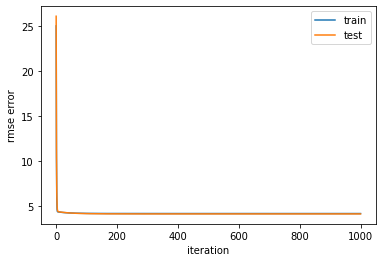

In [0]:
#Preprocessing and initialization
import random
random.seed(1)
theta0 = random.uniform(-1,1);
theta1 = random.uniform(-1,1);
theta2 = random.uniform(-1,1);
theta3 = random.uniform(-1,1);
theta4 = random.uniform(-1,1);

import numpy as np
X1 = x_Train['weight'].copy()
X2 = x_Train['displacement'].copy()
X3 = x_Train['weight_sqr'].copy()
X4 = x_Train['displacement_Sqr'].copy()

X1_ = x_Test['weight'].copy()
X2_ = x_Test['displacement'].copy()
X3_ = x_Test['weight_sqr'].copy()
X4_ = x_Test['displacement_Sqr'].copy()

X1 = (X1 - np.mean(X1))/np.std(X1);
X2 = (X2 - np.mean(X2))/np.std(X2);
X3 = (X3 - np.mean(X3))/np.std(X3);
X4 = (X4 - np.mean(X4))/np.std(X4);

X1_ = (X1_ - np.mean(X1_))/np.std(X1_);
X2_ = (X2_ - np.mean(X2_))/np.std(X2_);
X3_ = (X3_ - np.mean(X3_))/np.std(X3_);
X4_ = (X4_ - np.mean(X4_))/np.std(X4_);

Y_train = train_Set['mpg'].copy()
Y_test  = test_Set['mpg'].copy()
L = len(X1)

alpha = 0.3;
iterations = 1000
iteration_Nos = range(0, iterations)
train_err = [None] * len(iteration_Nos)
test_err  = [None] * len(iteration_Nos)
########################### Training
for i in iteration_Nos:
    trainerr = np.sqrt((1/L)*np.sum(np.square(theta0 + theta1*X1 + theta2*X2 + theta3*X3 + theta4*X4 - Y_train)))
    testerr  = np.sqrt((1/L)*np.sum(np.square(theta0 + theta1*X1_ + theta2*X2_ + theta3*X3_ + theta4*X4_ - Y_test)))
    train_err[i] = trainerr;
    test_err[i] = testerr;

    theta0 = theta0 - (alpha/L)*np.sum((2*(theta0 + theta1*X1 + theta2*X2 + theta3*X3 + theta4*X4  - Y)));
    theta1 = theta1 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 + theta3*X3 + theta4*X4 - Y),(X1) ));
    theta2 = theta2 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 + theta3*X3 + theta4*X4 - Y),(X2) ));
    theta3 = theta3 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 + theta3*X3 + theta4*X4 - Y),(X3) ));
    theta4 = theta4 - (alpha/L)*np.sum(np.multiply(2*(theta0 + theta1*X1 + theta2*X2 + theta3*X3 + theta4*X4 - Y),(X4) ));

plt.clf()
plt.plot(iteration_Nos,train_err,label = 'train')
plt.plot(iteration_Nos,test_err,label = 'test')
plt.xlabel('iteration')
plt.ylabel('rmse error')
plt.legend()
plt.show()


In [0]:
#QUESTION_4.2:
x_Train = pd.DataFrame()                                                        #collecting the training data from DataFrame
x_Train['weight'] = train_Set['weight']                                         #storing values of weight from training data set
x_Train['displacement'] = train_Set['displacement']                             #storing values of displacement from training data set      
x_Train['weight_sqr'] = np.square(train_Set['weight'])                          # computing square of weight
x_Train['displacement_Sqr'] = np.square(train_Set['displacement'])              # computing square of displacement

x_Test = pd.DataFrame()                                                         #collecting the test data from DataFrame      
x_Test['weight'] = test_Set['weight']                                           #storing values of weight from test data set
x_Test['displacement'] = test_Set['displacement']                               #storing values of displacement from test data set
x_Test['weight_sqr'] = np.square(test_Set['weight'])                            # computing square of weight
x_Test['displacement_Sqr'] = np.square(test_Set['displacement'])                # computing square of displacement

In [0]:
from sklearn.linear_model import LinearRegression                               # importing LinearRegression prediction model from library sklearn
from sklearn.metrics import mean_squared_error, r2_score                        # importing mean square eroor and r2_score from library sklearn

lin_model = LinearRegression()                                                  # making linear regression model
lin_model.fit(x_Train, train_sety)                                              #training the model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_train_predict = lin_model.predict(x_Train)                                    # predicting y for trained model
rmse = (np.sqrt(mean_squared_error(train_sety, y_train_predict)))               # finding root mean square error
r2 = r2_score(train_sety, y_train_predict)                                      # calculating R^2 score for training model

print("The model performance for training set")                                 # printing the required values
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")


y_test_predict = lin_model.predict(x_Test)                                      # predicting y for trained model  
rmse = (np.sqrt(mean_squared_error(test_sety, y_test_predict)))                 # finding root mean square error
r2 = r2_score(test_sety, y_test_predict)                                        # calculating R^2 score for test model      

print("The model performance for testing set")                                  # printing the required values
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.1936320485005645
R2 score is 0.7099296099349641


The model performance for testing set
--------------------------------------
RMSE is 4.057670184860346
R2 score is 0.7275258281850148


In [0]:
#Question_4.3
predict_x = x_Test.iloc[4].copy()
actual_y  = test_sety.iloc[4]
predicted_y = lin_model.predict([predict_x])
print(predict_x)
print("-")
print(actual_y)
print("-")
print(predicted_y[0])
'''
Difference is of approx 4
'''

weight                 2905.0
displacement            140.0
weight_sqr          8439025.0
displacement_Sqr      19600.0
Name: 336, dtype: float64
-
23.6
-
23.7190432237457


'\nDifference is of approx 4\n'

In [0]:
#Question_4.4:

def normalize(X):
  x_norm = (X-np.mean(X))/np.std(X);
  return x_norm;  
Y = test_sety
x1 = train_Set['displacement'];
X1 = normalize(train_Set['displacement']);
x2 = np.square(x1);
X2 = normalize(x2);
x3 = train_Set['weight'];
X3 = normalize(train_Set['weight']);
x4 = np.square(x3);
X4 = normalize(x4);
L = len(X1);
X0 = np.ones((1,L));

# Applying normal equation 
Xn = np.dstack((X0,X1,X2,X3,X4));
Xn = Xn.reshape(L,5);
#Xntrans = np.transpose(Xn);
xtemp1 = np.dot(Xn.T,Xn);
#xtemp2 = np.linalg.inv(xtemp1);
xtemp3 = np.dot(Xn.T,Yn);
thetan = np.dot(np.linalg.inv(xtemp1),xtemp3);

#print(thetan);
print('theta0 = ',thetan[0], 'theta1 = ', thetan[1], 'theta2 = ', thetan[2],'theta3 = ', thetan[3], 'theta4 = ', thetan[4],'\n')


plt.plot(thetan,'rp',label='Normal Eq. theta')
plt.plot([theta0,theta1,theta2,theta3,theta4],'bp',label='Gradient Descent theta')
plt.legend()




NameError: ignored